In [223]:
using DelimitedFiles

# Training range
# tspan = (0.3, 9.0)
# num_of_samples = 1000
# tsteps = range(tspan[1], tspan[2], length = num_of_samples)

points = 1200

1200

In [224]:
loaded_data = readdlm("data/original_extrapolation.txt")
original_data = Array{Float64}(loaded_data)
original_data = original_data[1:points, :]

1200×7 Matrix{Float64}:
  50.5     100.0      3.58717  500.0      -0.0      0.0       0.0
  53.7594   99.494    3.33194  500.0       0.0      0.0      92.8834
  63.5019   99.0437   3.26776  500.0      -0.0     -0.0      92.4745
  79.6205   98.4653   3.20616  500.0      -0.0     -0.0      91.9028
 101.875   101.439    3.14706  499.691   231.122   -0.0      91.3361
 128.155   112.581    3.09038  492.124  1381.23    -0.0      93.5784
 155.62    120.228    3.0361   474.187  2082.2      0.0     102.379
 183.421   133.656    2.98423  451.327  2469.06     0.0     114.054
 210.099   148.693    2.93482  425.159  2742.66     0.0     127.615
 234.257   164.75     2.88793  396.752  2917.99    -0.0     142.438
   ⋮                                                ⋮       
  13.4206   94.4785  11.4081   129.206    -0.0     13.0114   72.1746
  13.5472   94.0497  12.0748   130.472     0.0    225.075    71.7756
  13.8211   93.6232  13.4574   133.211     0.0    301.432    71.373
  14.1167   93.1992  14.53

In [225]:
loaded_data = readdlm("data/pinn_extrapolation.txt")
pinn_data = Array{Float64}(loaded_data)
pinn_data = pinn_data[1:points, :]
# pinn_data[:, 6] .= 1.0

1200×7 Matrix{Float64}:
  6.0        6.0       6.0       200.0      0.0      0.0         0.0
  6.92329    6.37507   5.97574   200.094   16.5864  -0.0262372   0.361367
  9.64226    7.36117   5.93393   199.957   69.0665  -0.0376558   1.3388
 14.384      9.61436   5.87058   199.493  144.417   -0.0492044   3.58233
 21.32      13.5456    5.77272   198.62   235.366   -0.064168    7.48996
 30.5259    19.4061    5.63321   197.275  336.586   -0.0803816  13.3083
 41.9415    27.3138    5.4524    195.406  442.671   -0.114346   21.1341
 55.3995    37.2866    5.23185   193.001  548.006   -0.171253   30.9782
 70.6349    49.2358    4.97502   190.075  647.253   -0.250878   42.753
 87.305     62.9727    4.68747   186.671  735.749   -0.351992   56.2723
  ⋮                                                  ⋮          
 -2.66096  166.872    -1.5144   -147.442   63.8332  35.45       64.5793
 -2.74698  166.976    -1.60016  -147.783   63.9433  35.3835     64.6075
 -2.83305  167.081    -1.68595  -148.126   64.0

In [226]:
loaded_data = readdlm("data/simple_extrapolation.txt")
simple_data = Array{Float64}(loaded_data)
simple_data = simple_data[1:points, :]
# simple_data[:, 6] .= 1.0

1200×7 Matrix{Float64}:
  6.0       6.0      6.0      200.0      0.0          0.0      0.0
  6.80403   6.0673   6.00001  199.924   22.325        0.0      0.060622
  9.19139   6.50202  6.00021  199.43    81.4962       0.0      0.452076
 13.0881    7.57871  6.00101  198.205  166.95         0.0      1.42135
 18.3582    9.48095  6.00302  196.033  269.009        0.0      3.13326
 24.7996   12.3079   6.00697  192.795  378.537        0.0      5.67654
 32.1511   16.08     6.01361  188.46   487.002        0.0      9.06882
 40.1101   20.7459   6.02371  183.076  586.794        0.0     13.2632
 48.3575   26.1931   6.03796  176.764  671.649        0.0     18.1578
 56.5848   32.2624   6.05692  169.697  737.041        0.0     23.6086
  ⋮                                                   ⋮       
  4.28722  69.6834   4.56332  143.841    4.17635e-5  46.0167  58.6668
  4.30098  69.1659   4.57478  144.3      4.17635e-5  45.6347  58.1902
  4.31462  68.6526   4.58616  144.755    4.17635e-5  45.2572  57.717

In [227]:
using Plots

function plot_differences(idx)
    x = 1:size(original_data, 1)
    
    y1 = original_data[:, idx]
    y2 = pinn_data[:, idx]
    y3 = simple_data[:, idx]
    
    plot(x, y1, label="Original", lw=2)
    plot!(x, y2, label="PINN", lw=2, linestyle=:dash)
    plot!(x, y3, label="Simple", lw=2, linestyle=:dot)
end

plot_differences (generic function with 1 method)

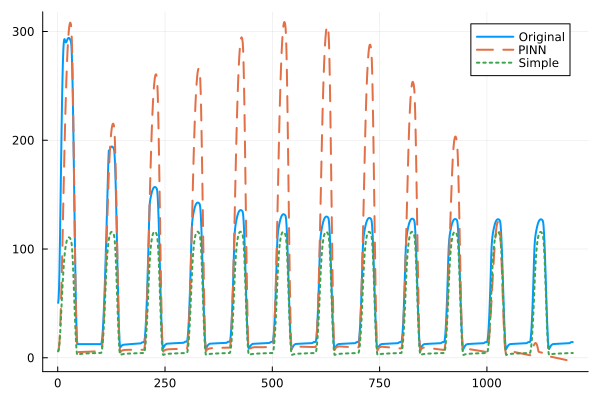

In [228]:
plot_differences(1)

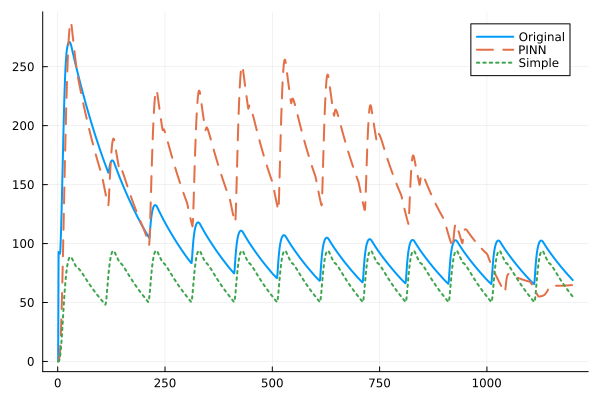

In [229]:
plot_differences(7)

In [ ]:
function plot_solution(sol, tspan::Tuple{Float64, Float64})
    layout = @layout [a b c; d e f; g e f]

    plot(
        plot_differences(1),
        plot_differences(2),
        plot_differences(3),
        plot_differences(4),
        plot_differences(5),
        plot_differences(6),
        plot_differences(7)
        layout = layout,
        size = (1000, 800)
    )
end

plot_solution (generic function with 1 method)

In [143]:
using Statistics

function normalize_data(data)
    means = mean(data, dims=1)
    stds = std(data, dims=1)

    normalized = (data .- means) ./ stds

    return normalized, means, stds
end

normalize_data (generic function with 1 method)

In [145]:
norm_data, norm_means, norm_stds = normalize_data(simple_data)
norm_data

1000×7 Matrix{Float64}:
 -0.679295   -1.26254  -0.550564  1.07104   -0.437917  -0.223592  -1.28243
 -0.665418   -1.2939   -0.517842  1.07837   -0.437917  -0.5558    -1.3174
 -0.624361   -1.325    -0.467944  1.07837   -0.437917  -0.5558    -1.35323
 -0.556434   -1.35582  -0.418482  1.07837   -0.437917  -0.5558    -1.38874
 -0.462383   -1.38637  -0.369455  1.07837   -0.437917  -0.5558    -1.42395
 -0.343239   -1.41666  -0.320856  1.07837   -0.437917  -0.5558    -1.45884
 -0.200311   -1.44667  -0.272684  1.07837   -0.437917  -0.5558    -1.49343
 -0.0351683  -1.47643  -0.224933  1.07837   -0.437917  -0.5558    -1.52772
  0.150377   -1.50593  -0.177601  1.07837   -0.437917  -0.5558    -1.56171
  0.354287   -1.53516  -0.130684  1.07837   -0.437917  -0.5558    -1.5954
  ⋮                                                     ⋮         
 -0.682163   -1.00699  -0.658232  0.945333  -0.437917  -0.201191  -1.0082
 -0.681845   -1.04044  -0.646651  0.962837  -0.437917  -0.204136  -1.04394
 -0.68153   